In [1]:
txt = 'anonymized-curriculum-access.txt'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import env

In [3]:
#Importing all the things needed to view the data

In [4]:
df= pd.read_table('anonymized-curriculum-access.txt',header=None)

In [5]:
df.head()

,0
0,2018-01-26 09:55:03 / 1 8 97.105.19.61
1,2018-01-26 09:56:02 java-ii 1 8 97.105.19.61
2,2018-01-26 09:56:05 java-ii/object-oriented-pr...
3,2018-01-26 09:56:06 slides/object_oriented_pro...
4,2018-01-26 09:56:24 javascript-i/conditionals ...


In [6]:
#Cheking the data 

In [7]:
df.nunique()

0    896471
dtype: int64

In [8]:
#Checking the amount of entries, let's clean the data

In [9]:
df[0][0].split()

['2018-01-26', '09:55:03', '/', '1', '8', '97.105.19.61']

In [10]:
#taking it appart to be aranged more coherently 

In [11]:
parts = df[0][0].split()

output = {}
output['date'] = parts[0]
output['time'] = parts[1]
output['address'] = parts[2]
output['ip'] = parts[5]
output

{'date': '2018-01-26',
 'time': '09:55:03',
 'address': '/',
 'ip': '97.105.19.61'}

In [12]:
pd.Series(output)

date         2018-01-26
time           09:55:03
address               /
ip         97.105.19.61
dtype: object

In [13]:
#It's time to make it a function

In [14]:
def parse_log_entry(entry):
    parts = entry.split()
    output = {}

    output['date'] = parts[0]
    output['time'] = parts[1]
    output['address'] = parts[2]
    output['ip'] = parts[-1]
    return pd.Series(output)

In [15]:
df = df[0].apply(parse_log_entry)

In [16]:
# Now to apply to the dataframe

In [17]:
df.head()

,date,time,address,ip
0,2018-01-26,09:55:03,/,97.105.19.61
1,2018-01-26,09:56:02,java-ii,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,97.105.19.61


In [18]:
df.ip.value_counts()

97.105.19.58       284579
97.105.19.61        61662
192.171.117.210      9515
71.150.217.33        6791
76.185.145.231       4754
                    ...  
172.58.109.140          1
99.203.213.59           1
99.203.212.173          1
173.239.198.246         1
72.181.124.244          1
Name: ip, Length: 5531, dtype: int64

In [19]:
#checking the count of each ip address

In [20]:
ip_df = pd.DataFrame(df.ip.value_counts(dropna=False)).reset_index().rename(columns={'index': 'ip', 'ip': 'count'})
ip_df.head()

,ip,count
0,97.105.19.58,284579
1,97.105.19.61,61662
2,192.171.117.210,9515
3,71.150.217.33,6791
4,76.185.145.231,4754


In [21]:
# finding the ip with the most counts

In [22]:
df.ip.count()

900223

In [23]:
#Finding the total count of all ip addresses

In [24]:
ip_df2 = pd.DataFrame((df.ip.value_counts(dropna=False))/df.ip.count()).reset_index().rename(columns={'index': 'ip', 'ip': 'chance'})
ip_df2.head()

,ip,chance
0,97.105.19.58,0.316121
1,97.105.19.61,0.068496
2,192.171.117.210,0.010570
3,71.150.217.33,0.007544
4,76.185.145.231,0.005281


In [25]:
#Checking the chances of all ip addresses 

In [26]:
284579/900223

0.3161205612387153

In [27]:
#To see if its correct, I take the top counted ip and divide it by the total ips and compare it to the previous df

In [28]:
ip_dfp = ip_df.merge(ip_df2, on='ip')
ip_dfp.head()

,ip,count,chance
0,97.105.19.58,284579,0.316121
1,97.105.19.61,61662,0.068496
2,192.171.117.210,9515,0.010570
3,71.150.217.33,6791,0.007544
4,76.185.145.231,4754,0.005281


In [29]:
#Merging the previous two df into one

In [30]:
ip_dfp.set_index('ip')['count'].sort_values()

ip
72.181.124.244          1
99.203.154.42           1
99.203.27.189           1
131.194.184.123         1
107.242.125.44          1
                    ...  
76.185.145.231       4754
71.150.217.33        6791
192.171.117.210      9515
97.105.19.61        61662
97.105.19.58       284579
Name: count, Length: 5531, dtype: int64

In [31]:
#Setting up a way to be made into visualized graphs

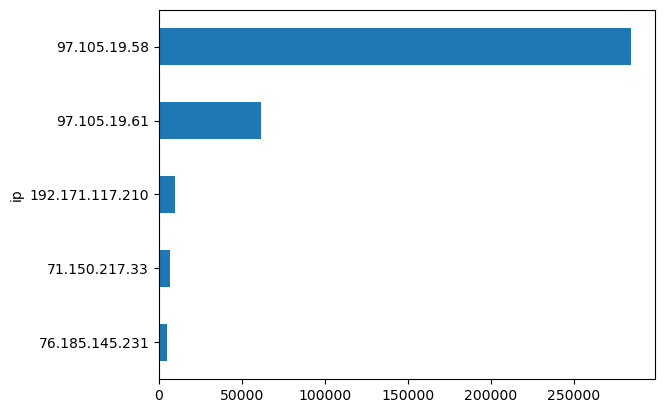

In [32]:
ip_dfp.set_index('ip')['count'].sort_values().tail(5).plot.barh()
plt.show()

In [33]:
def ip_dfpro():
    ip_dfp.set_index('ip')['count'].sort_values().tail(5).plot.barh()
    plt.show()

In [34]:
#A very star contrast of the first two, especially the first address.

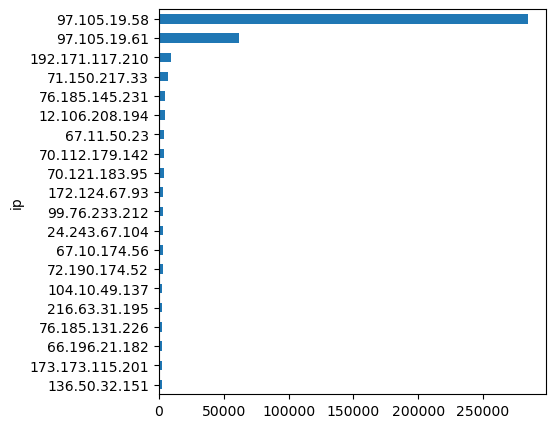

In [35]:
ip_dfp.set_index('ip')['count'].sort_values().tail(20).plot.barh(figsize=(5,5))
plt.show()

In [36]:
def ip_dfp():
    ip_df.set_index('ip')['count'].sort_values().tail(20).plot.barh(figsize=(5,5))
    plt.show()

In [37]:
#Checking to see more and it is more or less the same result.

In [38]:
time_df = pd.DataFrame(df.time.value_counts(dropna=False)).reset_index().rename(columns={'index': 'time', 'time': 'count'})
time_df.head()

,time,count
0,09:03:00,81
1,09:01:59,79
2,09:02:45,75
3,09:02:16,75
4,09:05:45,74


In [39]:
#Now I decided to check the time of the access of the address

In [40]:
time_df.tail()

,time,count
73162,04:58:23,1
73163,04:58:29,1
73164,04:58:30,1
73165,04:58:31,1
73166,07:28:59,1


In [41]:
#Checking the tail end

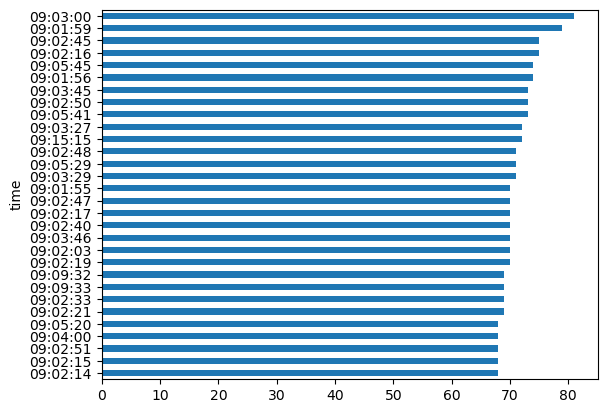

In [42]:
time_df.set_index('time')['count'].sort_values().tail(30).plot.barh()
plt.show()

In [43]:
def time_dfp():
    time_df.set_index('time')['count'].sort_values().tail(30).plot.barh()
    plt.show()

In [44]:
# A visualization on some of the times the ips were accessed

In [45]:
time_df = time_df.merge(ip_df, on='count')
time_df.head(20)

,time,count,ip
0,09:03:00,81,104.219.136.100
1,09:03:00,81,72.191.30.236
2,09:03:00,81,70.114.36.54
3,09:03:00,81,47.183.128.23
4,09:03:00,81,24.243.31.59
5,09:01:59,79,136.49.16.212
6,09:01:59,79,173.174.211.244
7,09:01:59,79,71.158.155.73
8,09:01:59,79,23.228.172.124
9,09:01:59,79,71.137.144.185


In [46]:
def df_accessp():
    time_df = time_df.merge(ip_df, on='count')
    time_df.head(20)

In [47]:
#Combining the df togther for more detail

In [48]:
add_df = pd.DataFrame(df.address.value_counts(dropna=False)).reset_index().rename(columns={'index': 'address', 'address': 'count'})
add_df

,address,count
0,/,50313
1,search/search_index.json,19519
2,javascript-i,18983
3,toc,18297
4,java-iii,13733
...,...,...
2309,12-distributed-ml/6.1-prepare-part-1,1
2310,12-distributed-ml/6.4-prepare-part-4,1
2311,4-python,1
2312,4-python/overview,1


In [49]:
#Now I check the address itself to see what I'm looking at

In [50]:
add_df2 = pd.DataFrame((df.address.value_counts(dropna=False))/df.ip.count()).reset_index().rename(columns={'index': 'address', 'address': 'chance'})
add_df2.head()

,address,chance
0,/,0.055889
1,search/search_index.json,0.021682
2,javascript-i,0.021087
3,toc,0.020325
4,java-iii,0.015255


In [51]:
#Checking the likelyhood of the visits to the addresses

In [52]:
add_dfp = add_df.merge(add_df2, on='address')
add_dfp.head()

,address,count,chance
0,/,50313,0.055889
1,search/search_index.json,19519,0.021682
2,javascript-i,18983,0.021087
3,toc,18297,0.020325
4,java-iii,13733,0.015255


In [53]:
#combining the previous df together 

In [54]:
add_dfp.set_index('address')['count'].sort_values()

address
appendix/professional-development/post-interview-review-form        1
content/git/index.html                                              1
students/units/75/sub_units/268                                     1
10.00_Intro                                                         1
students/300/notes                                                  1
                                                                ...  
java-iii                                                        13733
toc                                                             18297
javascript-i                                                    18983
search/search_index.json                                        19519
/                                                               50313
Name: count, Length: 2314, dtype: int64

In [55]:
#checking the counts of each address

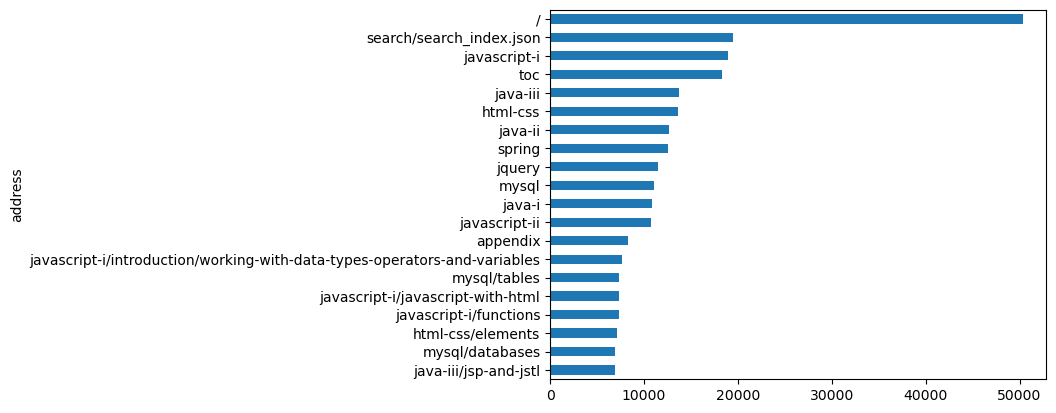

In [56]:
add_df.set_index('address')['count'].sort_values().tail(20).plot.barh()
plt.show()

In [57]:
def add_dfc():
    add_df.set_index('address')['count'].sort_values().tail(20).plot.barh()
    plt.show()

In [58]:
# My findings show a '/' address being the most popular, possibly being the homepage, but it could also be a dead page

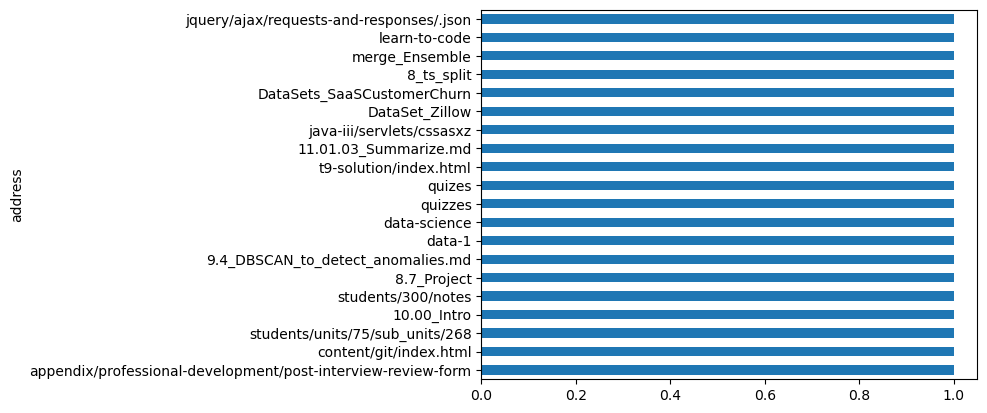

In [59]:
add_df.set_index('address')['count'].sort_values().head(20).plot.barh()
plt.show()

In [60]:
def add_df2c():
    add_df.set_index('address')['count'].sort_values().head(20).plot.barh()
    plt.show()

In [61]:
#Checking the bottom of the list, mostly resources.